# Изменение локальной плотности заряда в зависимости от ионной силы

In [1]:
import sys
sys.path.append('/home/tpopova/prj/PB_SCF/05_solvent_chi_flat/py_files')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import matplotlib.cm as cm

from matplotlib.cm import get_cmap
from create_in import create_in
from out_reader import out_reader
from scipy.signal import find_peaks

In [2]:
# pow(10, -2) * 1.66

N = 600

S_namics = 50

alpha = 0.4

Cs_range = np.linspace(0.008, 0.07, num = 6)

chi = 2.2

# chi_surf = 0.5
# chi_ions = 0.5


In [3]:
phi_brush_prof, psi_brush_prof, ends_brush_prof, local_dens = {}, {}, {}, {}
for cs in Cs_range:
    file_name_pro = create_in(
            range_param = 'cs',
            min_val = min(Cs_range),
            max_val = max(Cs_range),
            Cs = cs,
            chi_first_try = 0.5,
            chi_ions_first_try = 0.5,
            chi_surf_first_try = 0.5,
            N_layers_first_try = N - 250,
            N_first_try = N,

            S = S_namics,
            alpha = alpha,
            Kuhn = '1e-09',
            initial_cond = True,
            
            N_layers = N - 250,
            N = N,
            chi = chi,
            chi_ions = chi,
            chi_surf = chi
        )

    # Парсим профили
    psi, q, phi_brush, phi_end_brush, phi_Na, phi_Cl, phi_W = out_reader(alpha = alpha,file_names=file_name_pro)
    phi_brush_prof[cs] = (phi_brush)
    psi_brush_prof[cs] = (psi)
    ends_brush_prof[cs] = (phi_end_brush)
    local_dens[cs] = (q)

No output defined! 
No output defined! 
Problem nr 1 out of 2
The program is compiled for the use of 'long double' while 'overflow_protection' is not requested for;
1. Turn on 'overflow_protection'.
2. Compile progrem without the #define 'LongReal' in namics.h. 
NEWTON has been notified.
Your guess:it =  0  E = 2.270883e+00 |g| = 6.014344e+00 alpha = 1.000000e+00 
hessian scaling: 1.5807
it =  1  E = 2.078523e+00 |g| = 5.542444e+00 alpha = 1.166269e-01 
it =  2  E = 2.640423e+00 |g| = 6.063947e+00 alpha = 7.477796e-02 
it =  3  E = 6.021714e+00 |g| = 5.641117e+00 alpha = 1.238616e-02 
it =  4  E = 1.305677e+01 |g| = 5.906482e+00 alpha = 2.920352e-03 
it =  5  E = 5.728426e+00 |g| = 5.499072e+00 alpha = 1.462361e-02 
hessian scaling: 1.80325
it =  6  E = 1.882689e+00 |g| = 5.094563e+00 alpha = 1.181849e-01 
it =  7  E = 2.296992e+00 |g| = 5.757974e+00 alpha = 8.786039e-02 
it =  8  E = 6.900055e+00 |g| = 5.405286e+00 alpha = 8.501052e-03 
it =  9  E = 5.780767e+00 |g| = 5.417660e+00 alp

/tmp/ipykernel_37861/2728372047.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap("plasma")


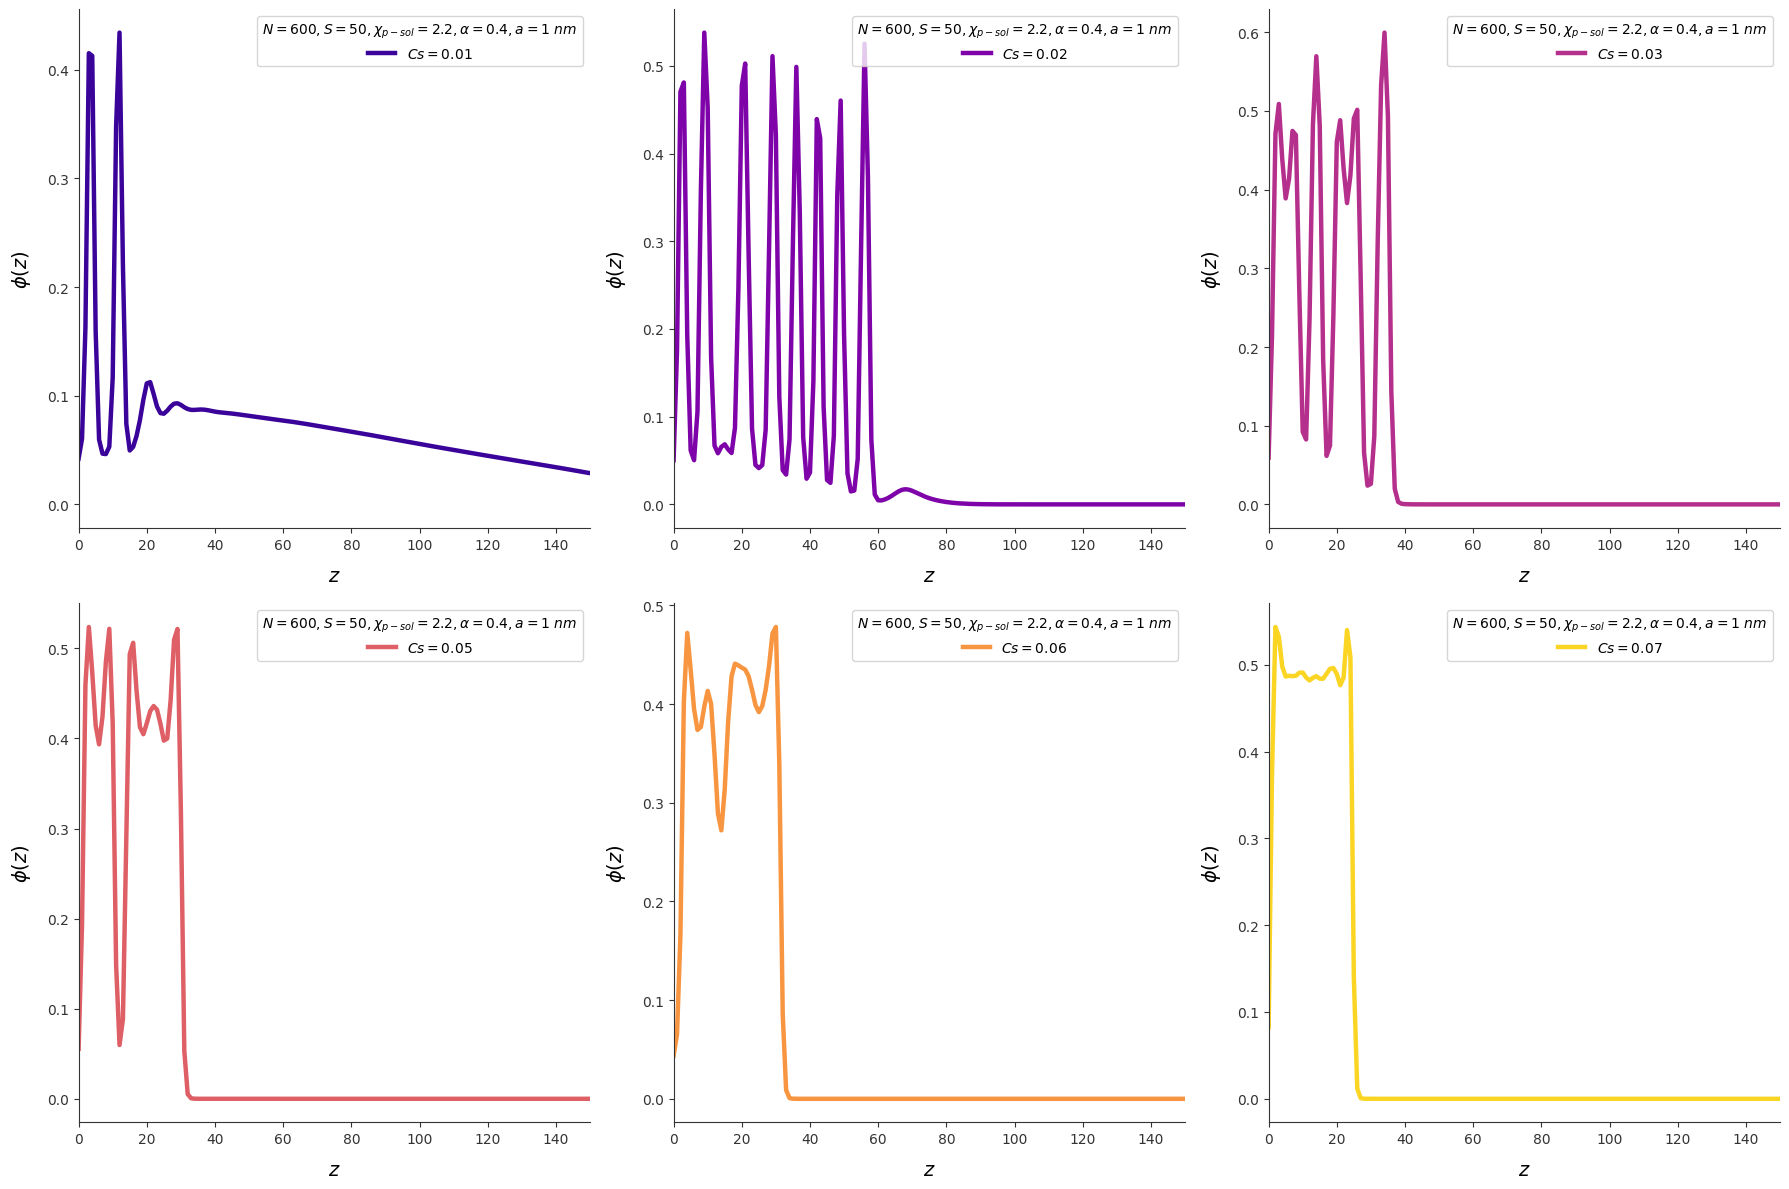

In [6]:
color_map = get_cmap("plasma")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Создаем сетку из 6 графиков (2 строки, 3 столбца)
axes = axes.flatten()  # Преобразуем массив осей в плоский список

for i, (cs, (phi_brush)) in enumerate(phi_brush_prof.items()):
    
    cs_by = Cs_range[i]

    base_color = color_map((i + 0.5) / len(Cs_range))
    ax = axes[i]  # Выбираем текущую ось
    
    ax.plot(phi_brush, label=f'$Cs = {cs:.2f}$', linewidth=3.2, color=base_color, linestyle="-")

    # Настройка визуализации для текущего окна
    ax.set_xlabel("$z$", fontsize=14, labelpad=10)
    ax.set_ylabel("$\\phi(z)$", fontsize=14, labelpad=10)
    ax.legend(fontsize=10, title=f'$N = {N}, S = {S_namics}, \\chi_{{p-sol}} = {chi}, \\alpha = {alpha}, a = 1 \\ nm$', 
              title_fontsize=10, loc="upper right")

    # Добавляем фон и рамку для текущего окна
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("#333333")
    ax.spines["bottom"].set_color("#333333")
    ax.tick_params(axis='both', which='major', labelsize=10, colors="#333333")
    
    ax.set_xlim(0,  150)

plt.tight_layout()
# plt.savefig('figure_3.pdf', dpi=300, bbox_inches='tight')
plt.show()


/tmp/ipykernel_37861/938923337.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = get_cmap("plasma")


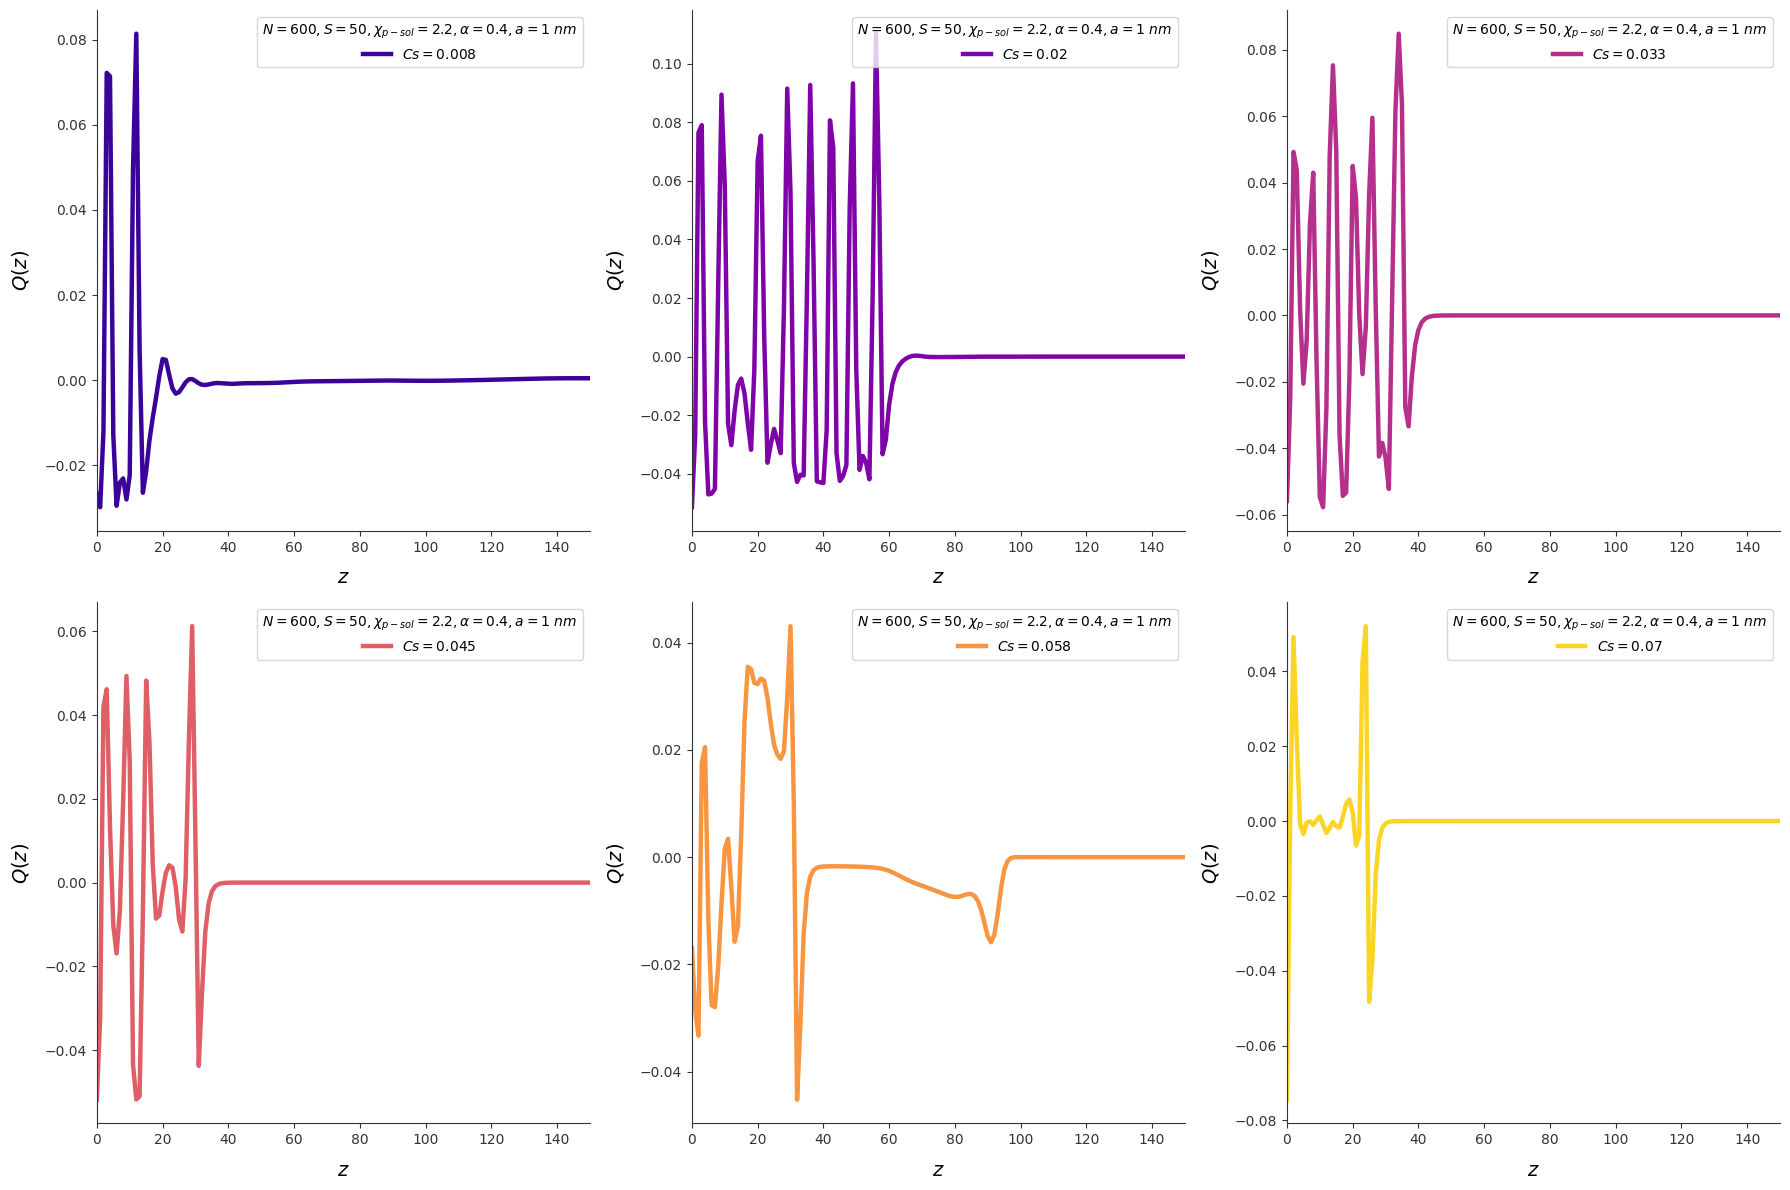

In [7]:
color_map = get_cmap("plasma")
fig, axes = plt.subplots(2, 3, figsize=(18, 12))  # Создаем сетку из 6 графиков (2 строки, 3 столбца)
axes = axes.flatten()  # Преобразуем массив осей в плоский список

for i, (cs, (q)) in enumerate(local_dens.items()):
    
    cs_by = Cs_range[i]

    base_color = color_map((i + 0.5) / len(Cs_range))
    ax = axes[i]  # Выбираем текущую ось
    
    ax.plot(q, label=f'$Cs = {cs:.2}$', linewidth=3.2, color=base_color, linestyle="-")

    # Настройка визуализации для текущего окна
    ax.set_xlabel("$z$", fontsize=14, labelpad=10)
    ax.set_ylabel("$Q(z)$", fontsize=14, labelpad=10)
    ax.legend(fontsize=10, title=f'$N = {N}, S = {S_namics}, \\chi_{{p-sol}} = {chi}, \\alpha = {alpha}, a = 1 \\ nm$', 
              title_fontsize=10, loc="upper right")

    # Добавляем фон и рамку для текущего окна
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["left"].set_color("#333333")
    ax.spines["bottom"].set_color("#333333")
    ax.tick_params(axis='both', which='major', labelsize=10, colors="#333333")
    
    ax.set_xlim(0,  150)

plt.tight_layout()
# plt.savefig('figure_3.pdf', dpi=300, bbox_inches='tight')
plt.show()
